# Apple Stock Analysis (2020 - 2025)
# By Max Yefimov

This project explores trends in Apple stock data from June 6th, 2020 to June 2nd, 2025 using Python and pandas. It covers performance metrics based primarily on the daily close values of AAPL stock, its volatility, and notable events that influence certain aspects of the data.

The stock data csv file was sourced from Kaggle, created by Saman Fatima:
https://www.kaggle.com/datasets/samanfatima7/2020-2025-apple-stock-dataset/code

This dataset in particular is interesting because it allowed me to use specific numerical data to highlight interesting turning points and trends, which when combined with outside research allowed for a more in-depth analysis.

## Step 0: Import Statements and Dataframe Creation

This step simply imports the necessary libraries to perform functions, along with creating a data frame by reading the csv downloaded from Kaggle.

In [2]:
#Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Visual adjustments
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
#Loading in dataset from CVS file
df = pd.read_csv("apple_5yr_one.csv", parse_dates=["Date"])

## Step 1: Data Cleaning and Additional Information

This step is necessary to make sure the information worked with is correctly formatted. Included in the csv was a row that simply had "AAPL" in the first row below the header for every column which was completely unnecessary. Thankfully this csv file included no "NaN" values which made cleanup a lot simpler.

In [11]:
#Checking contents
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1255 non-null   datetime64[ns]
 1   Close   1256 non-null   object        
 2   High    1256 non-null   object        
 3   Low     1256 non-null   object        
 4   Open    1256 non-null   object        
 5   Volume  1256 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 59.0+ KB


,Date
count,1255
mean,2022-11-30 12:32:42.071713280
min,2020-06-04 00:00:00
25%,2021-08-31 12:00:00
50%,2022-11-29 00:00:00
75%,2024-02-29 12:00:00
max,2025-06-02 00:00:00


In [13]:
df.isnull().sum()

Date      1
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Here I removed the first row to and reset the row index in order to create a purely numbers data frame, and checked to ensure that everything looks as intended.

In [27]:
#Dropping the unecessary stock name row
df = df.drop(index=0).reset_index(drop=True)

In [29]:
#Checking the contents once again
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1253 non-null   datetime64[ns]
 1   Close   1253 non-null   object        
 2   High    1253 non-null   object        
 3   Low     1253 non-null   object        
 4   Open    1253 non-null   object        
 5   Volume  1253 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 58.9+ KB


,Date,Close,High,Low,Open,Volume
0,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
1,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400
2,2020-06-10,85.74620819091797,86.21522971767824,84.1058417038533,84.54570234634012,166651600
3,2020-06-11,81.6294937133789,85.3136361549305,81.5274306203534,84.88835596262886,201662400
4,2020-06-12,82.33426666259766,84.52142258544907,81.22125057836313,83.77293248835645,200146000


In [31]:
#Making sure all columns are floats, along with checking for further none values
cols_to_convert = ["Open", "High", "Low", "Close", "Volume"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

### Creating New Columns
Here I included extra columns to break up the date into its different values in order to make it easier to create line graphs later in the analysis process.

In [33]:
#Adding extra columns for the different portions of the date
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["DayOfWeek"] = df["Date"].dt.day_name()

In [35]:
df

,Date,Close,High,Low,Open,Volume,Year,Month,Day,DayOfWeek
0,2020-06-08,81.036537,81.070563,79.544415,80.256454,95654400,2020,6,8,Monday
1,2020-06-09,83.595505,83.989192,80.684163,80.715756,147712400,2020,6,9,Tuesday
2,2020-06-10,85.746208,86.215230,84.105842,84.545702,166651600,2020,6,10,Wednesday
3,2020-06-11,81.629494,85.313636,81.527431,84.888356,201662400,2020,6,11,Thursday
4,2020-06-12,82.334267,84.521423,81.221251,83.772932,200146000,2020,6,12,Friday
...,...,...,...,...,...,...,...,...,...,...
1248,2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,2025,5,27,Tuesday
1249,2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,2025,5,28,Wednesday
1250,2025-05-29,199.949997,203.809998,198.509995,203.580002,51396800,2025,5,29,Thursday
1251,2025-05-30,200.850006,201.960007,196.779999,199.369995,70819900,2025,5,30,Friday


## Step 2: Initial Graph

This is the first graph created and shows the trend through every single data point included in the csv, based on the closing value of each day for the AAPL stock. Highlighting here that there appears to be an overall upwards trend from 2020 with a period of decline during the year of 2022. There is also significant dips in the past several months (February to April of 2025) that will be explored later.

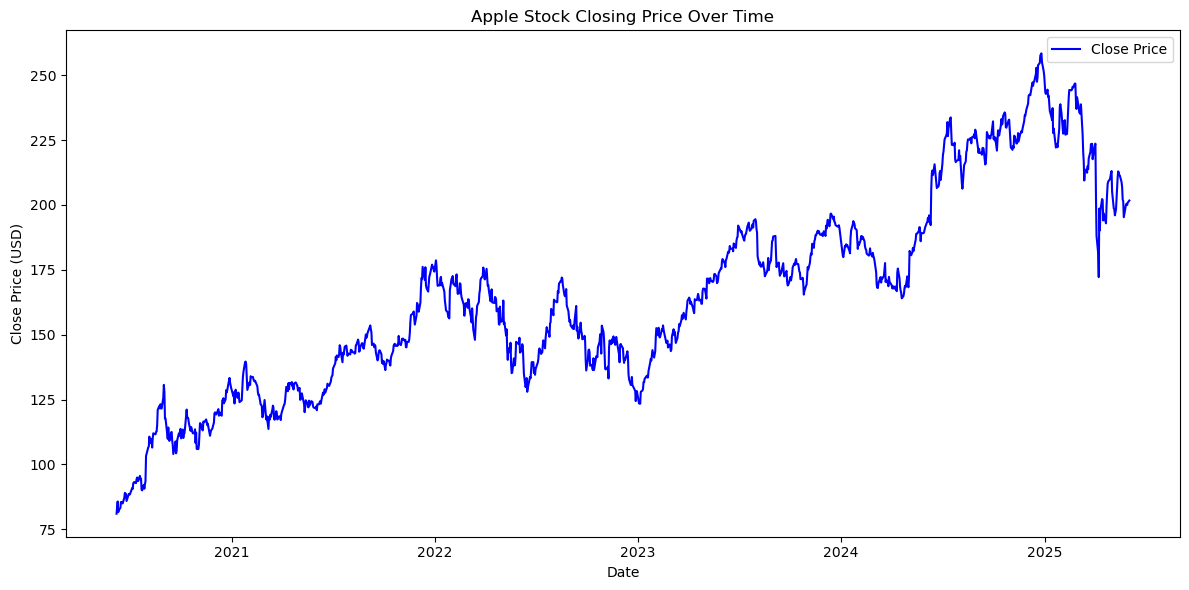

In [39]:
#Initial plot
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Close"], label="Close Price", color = "blue")
plt.title("Apple Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

## Step 3: Moving Averages and Graph

This graph is similar to the first one however we include moving averages. Moving averages are a common indicator of short and medium term trends in the stock price. Both 20 day intervals and 50 day intervals allow us to smooth out some of the volatility of the day to day market, showing visual signals of potential momentum shifts.

These moving averages can be used by traders and analysts to identify potential upward and downward trends and entry/exit points within a more controlled market representation. The combination of 20 and 50 day averages also allows us to compare short term vs. medium term, identifying key points such as bullish signals and bearish signals that carry more weight within analysis.

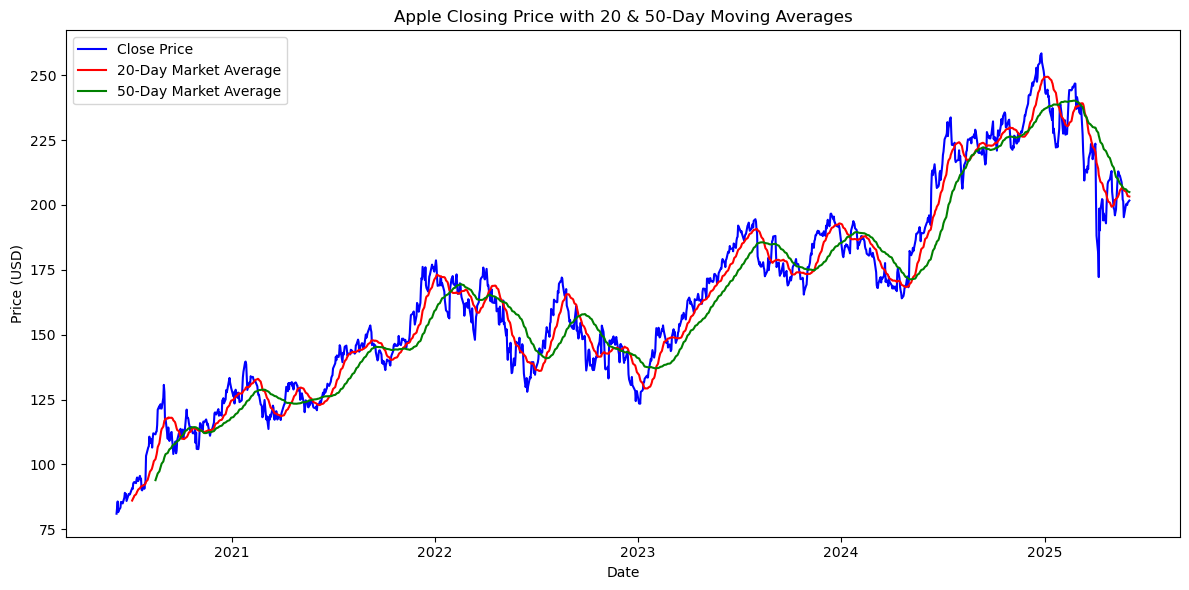

In [43]:
#Moving averages to clear up some of the noise of the day to day
df["MA20"] = df["Close"].rolling(window = 20).mean()
df["MA50"] = df["Close"].rolling(window = 50).mean()

#Actual plot - includes two extra lines for a 20 day and 50 day moving average
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Close"], label = "Close Price", color = "blue")
plt.plot(df["Date"], df["MA20"], label = "20-Day Market Average", color = "red")
plt.plot(df["Date"], df["MA50"], label = "50-Day Market Average", color = "green")
plt.title("Apple Closing Price with 20 & 50-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()
plt.show()

## Step 4: Daily Return

Daily return is a commonly used metric for comparing stock performance between days by utilizing the percent change between closing for adjacent days. This creates a visual of short term changes in Apple stock data and is a great visual representation of specific days with the biggest swings within the market. 

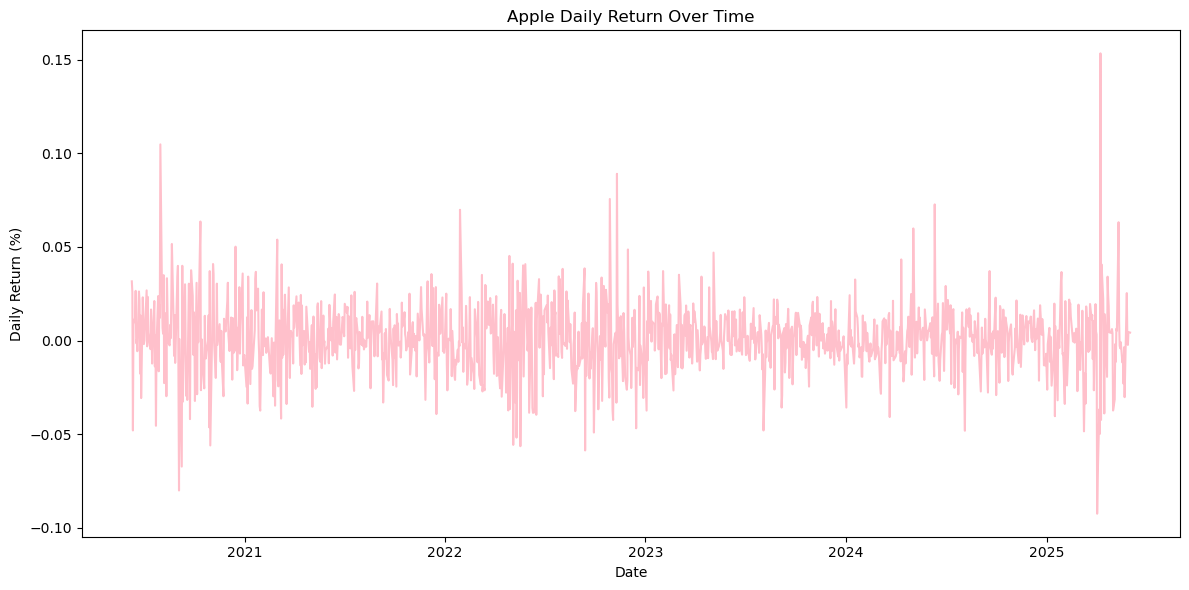

In [59]:
#Daily percent change to measure day-to-day stock performance
df["Daily Return"] = df["Close"].pct_change()

#Plotting Daily Return Over Time
plt.figure(figsize = (12, 6))
plt.plot(df["Date"], df["Daily Return"], color = "pink")
plt.title("Apple Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.tight_layout()
plt.show()

## Step 5: Yearly Volatility

This step is an extension of the previous one where we use the standard deviation of the Daily Return to identify which years had the highest volatility. This allows us to identify years that potentially had major events that influenced stocks heavily, particularly Apple. Noticeably among the highest are 2020 and 2025, the year of the COVID-19 pandemic and the current one.

A notable limitation is that 2025 is incomplete, and any major changes will make the year show up as much more volatile than it otherwise would be with a full year of data.

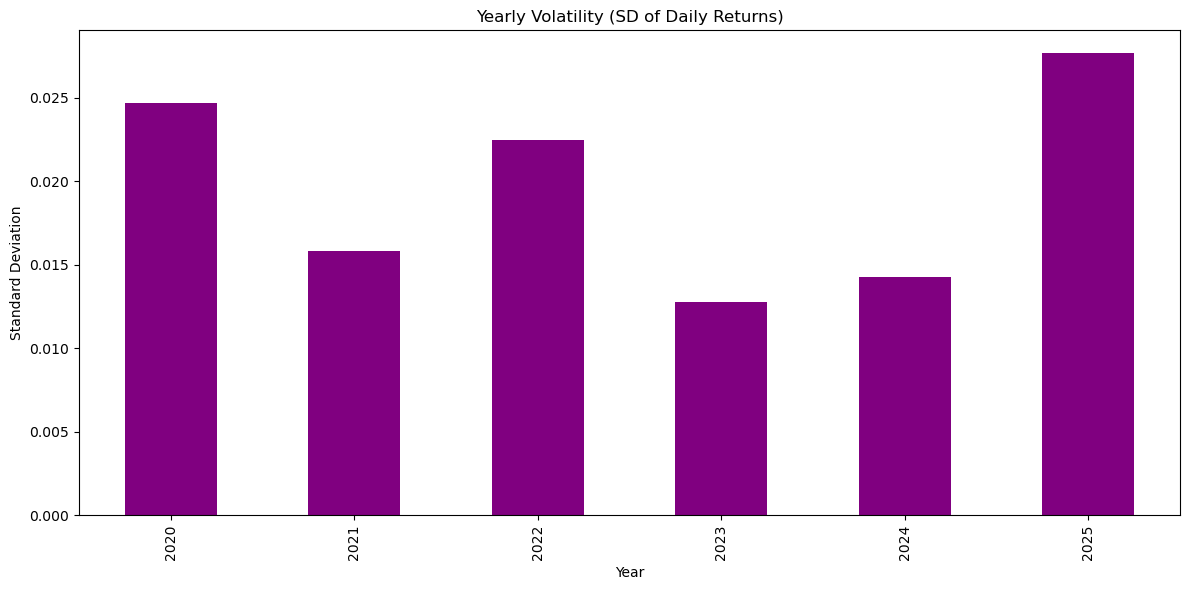

In [61]:
#Volatility of Years Graphed
year_volatility = df.groupby("Year")["Daily Return"].std()
year_volatility.plot(kind = "bar", color = "purple", figsize = (12, 6))
plt.title("Yearly Volatility (SD of Daily Returns)")
plt.ylabel("Standard Deviation")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Step 6: The Best 10 Days by Daily Return

This step is a culmination of all the previous ones. It highlights the 10 best days in this range of stock data by daily return, indicating days that had massively positive events for Apple stock (and potentially the stock market at large). Going through some of the days we have some events that likely influenced each day:

### 04/09/2025 - Reciprocal Tariffs Paused

The main event that boosted Apple (along with many other major tech companies) stock on April 9th was President Trump's pause on reciprocal tariffs. This paused pressure on the corporations who have large market chains that stretch internationally for the production of their products, meaning that it wouldn't cost as much to get the finished products to American consumers compared to importing with tariffs in place.

### 07/31/2025 - Progress Despite Pandemic

The likely factor that influenced such strong investor confidence within Apple was their Q3 performance report where they outperformed expectations. Considering this was several months into the pandemic along with general tech optimism this made Apple a strong candidate for investing as a ray of hope in the uncertain times of the pandemic.

### 11/10/2022 - Record Breaking Surge

This day marked a record-breaking surge by Apple driven mainly by news that inflation was taking a dip, sparking confidence within the market and especially within Apple, the leading company. An indicator of the peak of inflation was a big deal, highlighting an upward trend for the economy.

### 10/12/2020 - iPhone Launch and Innovation

A surge on this day was best explained by the anticipation of the upcoming iPhone 12. This phone featured a "once-in-a-decade" style upgrades (namely 5G internet) which according to indicators was going to be a major upgrade point for over 50% of the iPhone userbase. Confidence in a new and innovative model like the iPhone 12 drove investor hope to rally and drive up iPhone stock.

### 03/01/2021 - Rebounding

In February 2021 Apple stock had slid around 8% and March was an opportunity to capitalize for investors. While this doesn't mark a specific event it instead serves to show the basic market trends and strategies and how dips offer opportunities to capitalize for investors, especially when combined with overall enthusiasm in the industry.

In [63]:
#Top 10 Best Days Based on Daily Return
best_10_days = df.nlargest(10, "Daily Return")[["Date", "Daily Return"]]
print("Top 10 Best Days:")
print(best_10_days)

Top 10 Best Days:
           Date  Daily Return
1216 2025-04-09      0.153288
38   2020-07-31      0.104689
613  2022-11-10      0.088975
604  2022-10-28      0.075552
1009 2024-06-11      0.072649
415  2022-01-28      0.069778
88   2020-10-12      0.063520
1238 2025-05-12      0.063146
983  2024-05-03      0.059816
183  2021-03-01      0.053851


## Step 7: The Worst 10 Days by Daily Return

Similarly the Daily Return also allows us to measure the 10 worst days and the events that could be associated with them. The chart highlights the 10 worst days in this range of stock data, indicating days that had massively negative events or trends for Apple stock (and potentially the stock market at large). Going through some of the days we have some events that likely influenced each day:

### 04/03/2025 - "Liberation Day"

This stock plunge was directly influenced by President Trump's announcement of sweeping tariffs on foreign imports, with special emphasis on Chinese imports. As the iPhone relies on China (along with India and Vietnam) for the majority of its iPhone production it was seen as particularly vulnerable. Along with this the stock market in general crashed as although the tariffs were intended to bolster American industry they were quickly seen as massive negative impacts for the market.

### 09/03/2020 - Tech Downturn

Another example of trends vs. specific events, this day marked a major downturn for many tech stocks, including Apple stocks. Nasdaq in general fell 4.6% and combined with cautious investment during the uncertainty of the pandemic on economic endeavors lead to a drop for Apple which at the time was the largest one-day drop for a U.S-listed company.

### 09/13/2022 - Supply Chain Challenges

Along with general S&P500 downturn, Apple faced supply chain disruptions which influenced its stock evaluation as investors became concerned with the company's ability to deliver product. COVID-related lockdowns in China and semiconductor challenges damaged production of Apple products like the MacBook Pro, leading to some downturn.

### 10/30/2020 - Q4 Difficulties

Apple's Q4 report for 2020 was disappointing and shook investor confidence, highlighting how performance over time can cause short-term changes in stock valuation separate from specific daily events.

### 05/11/2022 - Interest Rate Hike

On this day the Federal Reserve chose to implement higher interest rates in order to combat inflation which was the largest increase since 2000. Although it was done to fight against inflation it raised concerns about economic slowdown and the current impacts of inflation, leading to less investment in the market which included Apple.

In [65]:
#Top 10 Worst Days Based on Daily Return
worst_10_days = df.nsmallest(10, "Daily Return")[["Date", "Daily Return"]]
print("Top 10 Worst Days:")
print(worst_10_days)

Top 10 Worst Days:
           Date  Daily Return
1212 2025-04-03     -0.092456
62   2020-09-03     -0.080061
1213 2025-04-04     -0.072887
64   2020-09-08     -0.067295
571  2022-09-13     -0.058679
491  2022-05-18     -0.056419
102  2020-10-30     -0.056018
482  2022-05-05     -0.055716
486  2022-05-11     -0.051841
1215 2025-04-08     -0.049818


## Step 8: Graphing Individual Days

This step is to have a visual representation of daily trends with specific indicators of the best and worst days. It is important to highlight how the best days are typically more spread out, while the worst days are shown to be a series of closely related events and decisions. This demonstrates the immediate impact of negative events, whereas typically positive increases are indicators of long term hope and trust in large stocks such as Apple. Visualizing these helps analysts understand market reactions and what events are likely to cause what trends.

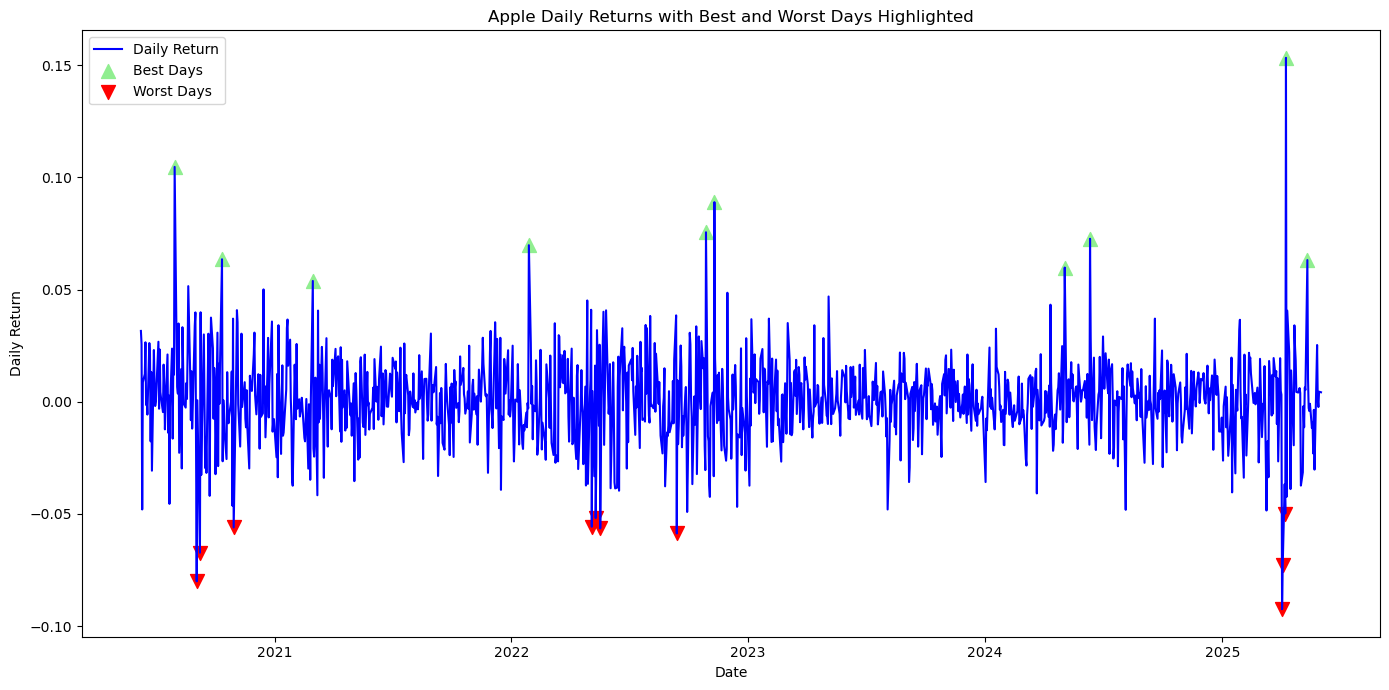

In [70]:
#Graphing the 10 best and worst days
plt.figure(figsize = (14,7))
plt.plot(df["Date"], df["Daily Return"], label = "Daily Return", color = "blue")

#Scatter plots
plt.scatter(best_10_days["Date"], best_10_days["Daily Return"], color = "lightgreen", label = "Best Days", marker = "^", s = 100)
plt.scatter(worst_10_days["Date"], worst_10_days["Daily Return"], color = "red", label = "Worst Days", marker = "v", s = 100)

#Labeling the graph
plt.title("Apple Daily Returns with Best and Worst Days Highlighted")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.tight_layout()
plt.show()

## Step 9: Yearly Performances

The most basic visualization of overall trends a yearly average performance allows us to visualize the general upward trend highlighted in Apple closing stock price over time with steady improvements across the years after the pandemic.

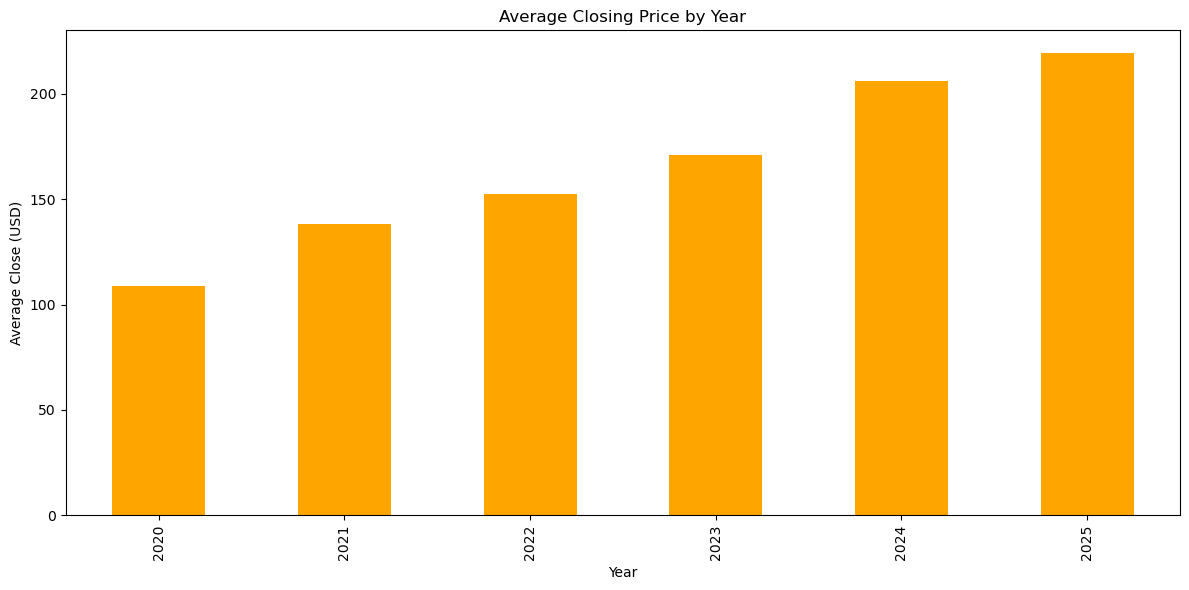

In [72]:
#Yearly Performances
avg_yearly = df.groupby("Year")["Close"].mean()

plt.figure(figsize = (12, 6))
avg_yearly.plot(kind = "bar", color = "orange")
plt.title("Average Closing Price by Year")
plt.ylabel("Average Close (USD)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

## Step 10: Monthly Performances

The graph for the average closing price by month across all years allows us to see if there is a large difference between performances over each month, highlighting any potential patterns in the year stock trends. Although June appears to be a little lower than other months this does not appear to be statistically significant.

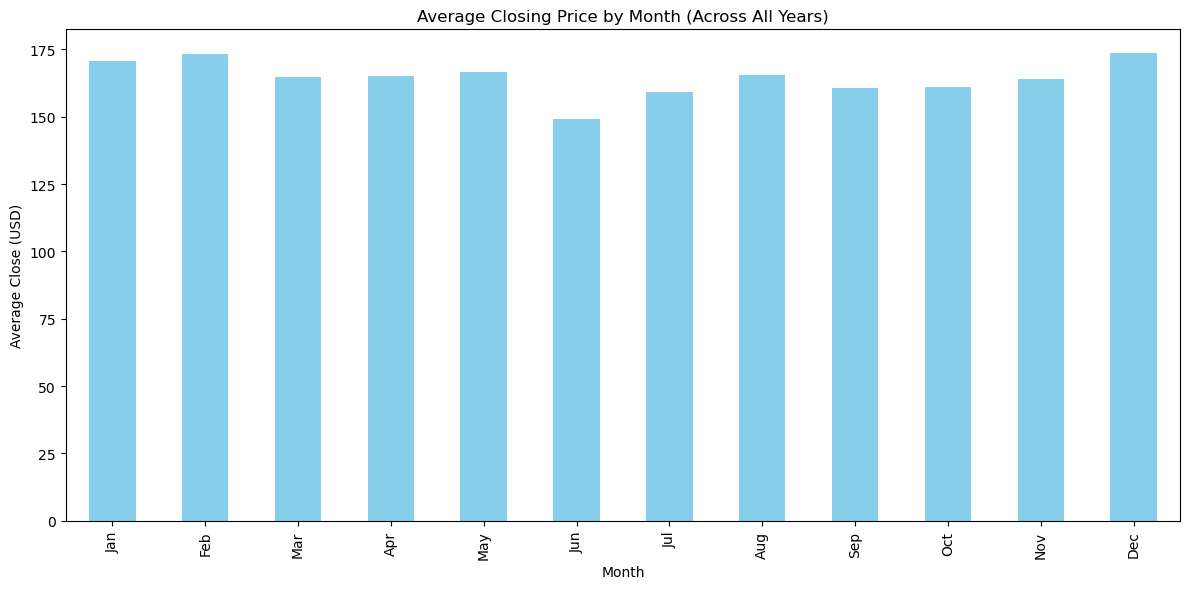

In [76]:
#Monthly and Yearly Performances
avg_monthly = df.groupby("Month")["Close"].mean()

plt.figure(figsize = (12, 6))
avg_monthly.plot(kind = "bar", color = "skyblue")
plt.title("Average Closing Price by Month (Across All Years)")
plt.ylabel("Average Close (USD)")
plt.xlabel("Month")

#Ticks change for x-axis to combine the averages of all months
plt.xticks(ticks = range(0, 12), labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.tight_layout()
plt.show()

# Conclusion

Through this exploration of the trends of Apple stock data we can identify that there are many different factors that go into the closing price of Apple stock. Some examples include:

## Trade Policy

Trade policy of Presidents can cause massive swings on the stock valuation of large international companies such as Apple. With supply chains stretching across the globe and centered in Asia any restrictions on the free movement of product and materials drives up costs along every link in the chain. While possibly done for political reasons, these restrictions often have direct economic impacts that are apolitical and can escalate. Trade tensions and pressure can result in trade wars, further escalating the price for companies that rely on the global connectivity of the modern world.

## Investing Strategies

The performance of Apple by itself can be enough to change market opinion, regardless of the reason. Investors are in the market to make profits and therefore indicators of company slowdown can cause caution. However, this can also balance itself out with capitalization on the dip in order to make a profit since generally large companies like Apple can be trusted to steadily gain over time. Even more so, positive performances above expectations can result in larger confidence to invest into Apple as a stock with promise.

## Product Development

Perhaps the most obvious stock driver is visible innovation and improvement in the products of companies. Although companies may be criticized for not inventing "enough," the major changes and upgrades to things like phones spark strong positive reactions and hopes for future revenue growth for the company. 

## Monetary and Fiscal Policy

Not necessarily an Apple specific response, but stocks in general can be influenced by perceived inflation rates and potential economic downturns leading to investors wanting to keep money in their pockets instead of storing them in the market. However it also goes the other way, where strong economic indicators can cause investing sprees, further bolstering the economy during good periods.

## Final Thoughts

Apple stock cannot be explained by one singular factor or by only looking at major events. However by utilizing concrete, numerical data we can see trends and impacts of everything that we could want to look at. This project specifically was very interesting as the dataset focused on the last 5 years, the years that I personally remember best and allowing me to understand how economic trend coincided with worldwide and national developments in both policy and culture.

On a technical level, it helped me develop skills in data cleaning, time series analysis, and financial visualization using pandas and matplotlib. More importantly, it helped me see how raw data can be turned into insight for understanding market behavior and the stories that go along with it. This has also shown me that no single event or indicator can fully explain stock movement, but by incorporating multiple factors data becomes a powerful tool to understand complexity. I look forward to applying these skills to projects to see how interweaving trends influence different aspects of the world.